# ANÁLISIS DE ALERTA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_logins = pd.read_csv("Logins_Fallidos.csv") 

In [2]:
print(df_logins.head())

                      _time          Servidor    vd   type subtype  \
0  Tue Aug 31 15:30:55 2021  FGT60E4Q16045068  root  event     vpn   
1  Tue Aug 31 14:21:44 2021  FG10E1TB19900657  root  event     vpn   
2  Tue Aug 31 12:18:51 2021  FG10E1TB19900657  root  event     vpn   
3  Tue Aug 31 12:18:31 2021  FG10E1TB19900657  root  event     vpn   
4  Tue Aug 31 12:16:37 2021  FG10E1TB19900657  root  event     vpn   

           accion         devname            eventtime  level  \
0  ssl-login-fail         TJSM-BA           1630434653  alert   
1  ssl-login-fail  CEPU_BA_FG10E1  1630430503940807968  alert   
2  ssl-login-fail  CEPU_BA_FG10E1  1630423129365172184  alert   
3  ssl-login-fail  CEPU_BA_FG10E1  1630423110737284913  alert   
4  ssl-login-fail  CEPU_BA_FG10E1  1630422995366171961  alert   

              logdesc                           msg  \
0  SSL VPN login fail  SSL user failed to logged in   
1  SSL VPN login fail  SSL user failed to logged in   
2  SSL VPN login fail  

### Parseo el formato de fecha en columnas distintas

In [3]:
time = df_logins["_time"].apply(str.split)
lst_time = []
for i in range(0,len(time)-1):
    lst_time.append(time[i])
    
#Armo un dataframe con el datetime:
df_time = pd.DataFrame(lst_time, columns = ["dia_nombre", "mes_nombre", "dia_num", "hora", "año_num"])


In [4]:
#Concateno los dos dataframe:
df_Logins =pd.concat([df_time,df_logins], axis = 1)
#Elimino la columna del campo datetime, ya no la necesito:
del df_Logins["_time"]
print(df_Logins.head())

  dia_nombre mes_nombre dia_num      hora año_num          Servidor    vd  \
0        Tue        Aug      31  15:30:55    2021  FGT60E4Q16045068  root   
1        Tue        Aug      31  14:21:44    2021  FG10E1TB19900657  root   
2        Tue        Aug      31  12:18:51    2021  FG10E1TB19900657  root   
3        Tue        Aug      31  12:18:31    2021  FG10E1TB19900657  root   
4        Tue        Aug      31  12:16:37    2021  FG10E1TB19900657  root   

    type subtype          accion         devname            eventtime  level  \
0  event     vpn  ssl-login-fail         TJSM-BA           1630434653  alert   
1  event     vpn  ssl-login-fail  CEPU_BA_FG10E1  1630430503940807968  alert   
2  event     vpn  ssl-login-fail  CEPU_BA_FG10E1  1630423129365172184  alert   
3  event     vpn  ssl-login-fail  CEPU_BA_FG10E1  1630423110737284913  alert   
4  event     vpn  ssl-login-fail  CEPU_BA_FG10E1  1630422995366171961  alert   

              logdesc                           msg  \
0

In [5]:
y = df_Logins.groupby("dia_num").count()["msg"]
print(y[0])

11


In [31]:
df_Logins = df_Logins.dropna(subset= ["dia_num"])
print(df_Logins)

     dia_nombre mes_nombre dia_num      hora año_num          Servidor    vd  \
0           Tue        Aug      31  15:30:55    2021  FGT60E4Q16045068  root   
1           Tue        Aug      31  14:21:44    2021  FG10E1TB19900657  root   
2           Tue        Aug      31  12:18:51    2021  FG10E1TB19900657  root   
3           Tue        Aug      31  12:18:31    2021  FG10E1TB19900657  root   
4           Tue        Aug      31  12:16:37    2021  FG10E1TB19900657  root   
...         ...        ...     ...       ...     ...               ...   ...   
7015        Mon        Aug       2  15:37:18    2021  FG10E1TB19900657  root   
7016        Mon        Aug       2  15:19:31    2021  FG10E1TB19900657  root   
7017        Mon        Aug       2  15:18:47    2021  FG10E1TB19900657  root   
7018        Mon        Aug       2  11:15:46    2021  FG10E1TB19900657  root   
7019        Mon        Aug       2  11:14:16    2021  FG10E1TB19900657  root   

       type subtype          accion    

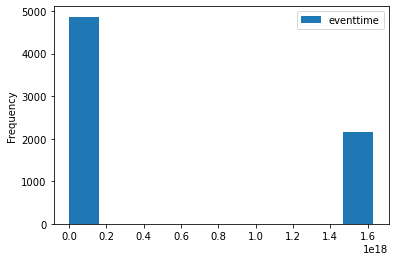

In [14]:
fig, ax = plt.subplots()
df_Logins.plot(kind= "hist" ,x = "dia_num", ax = ax)
plt.show()

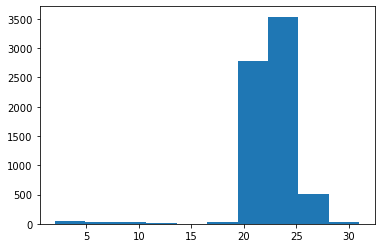

In [43]:
plt.hist(df_Logins["dia_num"])
plt.show()

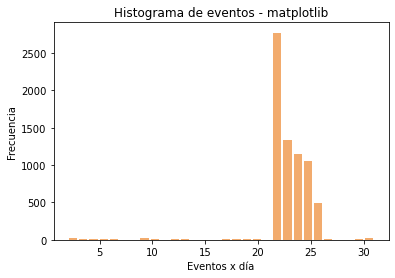

In [63]:
plt.hist(df_Logins["dia_num"], bins= 30, color='#F2AB6D', rwidth=0.8)   # rwidth es el ancho de las barras.
                                                                        # 1 es el max y quedan pegadas
plt.title('Histograma de eventos - matplotlib')
plt.xlabel('Eventos x día')
plt.ylabel('Frecuencia')
#plt.xticks(intervalos)
plt.show()

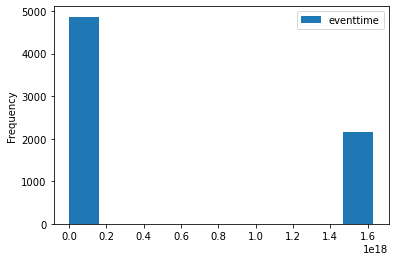

In [48]:
fig, ax1 = plt.subplots()
df_Logins.plot('dia_num', kind = "hist", ax=ax1)
plt.show()

In [39]:
df_Logins.dtypes

dia_nombre    object
mes_nombre    object
dia_num        int32
hora          object
año_num       object
Servidor      object
vd            object
type          object
subtype       object
accion        object
devname       object
eventtime      int64
level         object
logdesc       object
msg           object
reason        object
remip         object
tunneltype    object
user          object
dtype: object

In [36]:
df_Logins = df_Logins.astype({"dia_num": "int"})

In [32]:
df_Logins.shape

(7020, 19)

In [41]:
df_Logins.dia_num

0       31
1       31
2       31
3       31
4       31
        ..
7015     2
7016     2
7017     2
7018     2
7019     2
Name: dia_num, Length: 7020, dtype: int32